In [1]:
# for spotify 
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials, SpotifyOAuth

# os dependencies
import sys
import os

import pandas as pd 
import numpy as sns
import matplotlib.pyplot as plt 
import seaborn as sns
plt.rcParams['font.family'] = 'avenir'


### A Thought!
what if we use mongodb to store the post-analytics results of a particular user?

In [2]:
# SPOTIPY_CLIENT_ID = "0be1da36f0594963b21a361ae5bd5d0"
# SPOTIPY_CLIENT_SECRET = "093f6e330b414e4cbda05e95dbc0bef"
# SPOTIPY_REDIRECT_URI = 'http://localhost:8080/callback'

client_id = SPOTIPY_CLIENT_ID
client_secret = SPOTIPY_CLIENT_SECRET

In [ ]:
# addition 7

In [4]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth
import os 

# Set up the Spotipy OAuth object
sp_oauth = SpotifyOAuth(SPOTIPY_CLIENT_ID, SPOTIPY_CLIENT_SECRET, SPOTIPY_REDIRECT_URI, scope='playlist-read-private')

#Get user's authorization
token_info = sp_oauth.get_cached_token()
if not token_info:
    auth_url = sp_oauth.get_authorize_url()
    print(f'Please visit this URL to authorize the application: {auth_url}')
    response = input('Enter the URL you were redirected to: ')
    token_info = sp_oauth.get_access_token(response)

# Create a Spotipy object with the obtained token
sp = spotipy.Spotify(auth=token_info['access_token'])

# Get user's username
username = input('Enter Spotify username: ')

# Get user's playlists
playlists = sp.user_playlists(username)

# Display user's playlists
print(f"\n{username}'s playlists:")
for playlist in playlists['items']:
    print(f"  {playlist['name']} (id: {playlist['id']})")

# Get songs from a specific playlist
playlist_id = input('\nEnter the playlist ID to get songs from: ')
results = sp.playlist_tracks(playlist_id)

# Display songs from the playlist
print('\nSongs in the playlist:')
for track in results['items']:
    print(f"  {track['track']['name']} by {track['track']['artists'][0]['name']}")


Enter Spotify username: nocturnel99

nocturnel99's playlists:
  Your Top Songs 2023 (id: 37i9dQZF1Fa1IIVtEpGUcU)
  Ye (id: 2wLU1v4DfGM5iHn7D6FHmc)
  Neural Retrospection (id: 78Z28Kqp2mZvFDhGr4zZ2Q)
  Muscle Hypertrophy (id: 2HWHSWZvP7bf6jw41voDul)
  Shepard Tones (id: 4c5QsFfKkwGx3842nogeP6)
  Spirituality (id: 2eh9vqlJtrdBPAdKt2KzQV)
  RAP GOLDEN AGE (id: 6avcxlLLhOt8LoiuSgok2N)
  Brain fuck Code; (id: 6JsywVSM6Iav6lDHYYwwtL)
  Unsophisticated Code; (id: 6nlygRb8WVUhgbFBixQy2f)
  All Out 00's Telugu (id: 37i9dQZF1DXcrFZ8UTtxv9)
  Tranquility (id: 6IKepkvrPphQaDltrZjM6Y)
  Metal (id: 5YIg710T25jOQCoT8YxJXT)
  Psychedelics  (id: 3FF14kShJex0eMEBKJ0lm0)
  Complex Vocals (id: 12mN80CWfrsH8J2tHRQ2Q1)
  Nostalgia (id: 3Caue9V2okiV7aLpK4yNlt)
  Micheal Jackson (id: 3u8rPrpx0OnaH9Nk0PMo14)
  State of Mind (id: 7zOcTb2poIU4JgzJ4mJcSV)
  Hindi (id: 05U5u0gRLo3OLP1SQ70aeS)
  Telugu (id: 0ZPlDexP2aAjYHpm251MkL)
  Cyphers (id: 04LqQCvif58tI8SOWr1BVA)
  Stan (id: 08DNiQC9VmN6nrn5dJ7E1Q)
  Euphoria

In [6]:
# for track in results['items']:
#     print(f"  {track['track']['name']} by {track['track']['artists'][0]['name']}")
# #     print(track.keys())
# #     print(track['track'].keys())
#     print(track['track']['album'].keys())
#     print(track['track']['album']
# #     print(track['track']['album']['images'][0]['url'])
    
#     break

In [19]:
for track in results['items']:
    print(f"  {track['track']['name']} by {track['track']['artists'][0]['name']}")

In [7]:
def format_song_list(results):
    song_list = []
    for track in results['items']:
        song_list.append(track['track']['name'])
    
    return song_list

In [8]:
SONGS = format_song_list(results)

In [9]:

def get_audio_features(song_name, client_id, client_secret):
    # Initialize Spotipy client credentials manager
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    # Search for the song by name
    results = sp.search(q=song_name, type='track', limit=1)

    # Check if any tracks were found
    if results['tracks']['items']:
        track_id = results['tracks']['items'][0]['id']
        
        # Get audio features for the track
        audio_features = sp.audio_features(track_id)
        
        if audio_features:
            # Extract the relevant audio features
            features = audio_features[0]
            feature_names = [
                'danceability', 'energy', 'key', 'loudness', 'mode', 
                'speechiness', 'acousticness', 'instrumentalness', 
                'liveness', 'valence', 'tempo', 'duration_ms'
            ]
            
            # Create a list of audio feature values
            feature_values = [features[feature] for feature in feature_names]
            
            return feature_values
        else:
            return None  # Audio features not found for the track
    else:
        return None  # Track not found

# Example usage
attributes = ['Danceability', 'Energy', 'Key', 'Loudness', 'Mode', 
             'Speechiness', 'Acousticness', 'Instrumentalness', 
             'Liveness', 'Valence', 'Tempo', 'Duration (ms)']

SONG_DICTIONARY = {}

for song in SONGS:
    audio_features_dictionary = {}
    print(f"Fetching {song}, ",end=" ")
    audio_features = get_audio_features(song, client_id, client_secret)
    if audio_features:
        for feature, value in zip(attributes, audio_features):
            audio_features_dictionary[feature] = value
        
        SONG_DICTIONARY[song] = audio_features_dictionary
        
    else:
        print(f"UnAvailable")
    
    print("Done!")
    
    
audio_features_df = pd.DataFrame(SONG_DICTIONARY).T.reset_index()
cols = audio_features_df.columns 
cols = list(cols)
cols[0] = 'song'
audio_features_df.columns = cols
audio_features_df

# print(SONG_DICTIONARY)

Fetching PSY or DIE,  Done!
Fetching Edge,  Done!
Fetching Relax,  Done!
Fetching Diluted Brains,  Done!
Fetching Premonition,  Done!
Fetching DRUGS!,  Done!
Fetching Synesthesia,  Done!
Fetching Ascension,  Done!
Fetching Witching Hour,  Done!
Fetching Life & Death,  Done!
Fetching Spider On The Moon,  Done!
Fetching Let Me In,  Done!
Fetching Sacrificial,  Done!
Fetching Spun,  Done!
Fetching Vortex,  Done!
Fetching ID3,  Done!
Fetching ID7,  Done!
Fetching ID8,  Done!
Fetching Taste of You,  Done!
Fetching Hypnocurrency,  Done!
Fetching Orbit,  Done!
Fetching Hell on Earth,  Done!
Fetching Dark Age,  Done!
Fetching Kiss of Death,  Done!
Fetching Stress,  Done!
Fetching Lonely,  Done!
Fetching Mixed Signals,  Done!
Fetching Flying Octopus,  Done!
Fetching Fourth Impact,  Done!
Fetching Purple Gusher,  Done!
Fetching Melancholy,  Done!
Fetching Paranoid,  Done!
Fetching Plague,  Done!
Fetching Superliminal,  Done!
Fetching Great Spirit,  Done!
Fetching End of Line,  Done!
Fetching Vio

,song,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,PSY or DIE,0.484,0.7560,6.0,-4.379,0.0,0.0579,0.002090,0.314000,0.3000,0.2390,139.909,187093.0
1,Edge,0.590,0.8280,0.0,-6.280,1.0,0.0439,0.277000,0.000006,0.0868,0.6360,111.353,329680.0
2,Relax,0.548,0.0282,7.0,-26.562,1.0,0.0441,0.936000,0.596000,0.1920,0.2200,108.517,97025.0
3,Diluted Brains,0.672,0.7330,5.0,-9.856,0.0,0.1180,0.138000,0.700000,0.1200,0.2540,194.071,247423.0
4,Premonition,0.849,0.6400,1.0,-5.193,1.0,0.3620,0.026800,0.000895,0.3830,0.4970,165.993,173882.0
5,DRUGS!,0.867,0.8260,2.0,-2.318,1.0,0.0906,0.009340,0.153000,0.0585,0.4730,143.024,214825.0
6,Synesthesia,0.575,0.3970,7.0,-9.161,1.0,0.0308,0.756000,0.000000,0.2790,0.2020,129.843,259067.0
7,Ascension,0.762,0.4590,0.0,-10.307,1.0,0.0379,0.111000,0.021900,0.1470,0.7490,96.069,345976.0
8,Witching Hour,0.539,0.9380,2.0,-4.331,1.0,0.0403,0.000890,0.000034,0.2200,0.6140,152.980,249640.0
9,Life & Death,0.753,0.5270,10.0,-5.411,0.0,0.2190,0.040300,0.014500,0.1020,0.3010,104.998,189143.0


In [11]:
audio_features_df.to_csv("playlist_2.csv",index=False)

In [10]:
audio_features_df = pd.DataFrame(SONG_DICTIONARY).T.reset_index()
cols = audio_features_df.columns 
cols = list(cols)
cols[0] = 'song'
audio_features_df.columns = cols
audio_features_df

,song,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration (ms)
0,PSY or DIE,0.484,0.7560,6.0,-4.379,0.0,0.0579,0.002090,0.314000,0.3000,0.2390,139.909,187093.0
1,Edge,0.590,0.8280,0.0,-6.280,1.0,0.0439,0.277000,0.000006,0.0868,0.6360,111.353,329680.0
2,Relax,0.548,0.0282,7.0,-26.562,1.0,0.0441,0.936000,0.596000,0.1920,0.2200,108.517,97025.0
3,Diluted Brains,0.672,0.7330,5.0,-9.856,0.0,0.1180,0.138000,0.700000,0.1200,0.2540,194.071,247423.0
4,Premonition,0.849,0.6400,1.0,-5.193,1.0,0.3620,0.026800,0.000895,0.3830,0.4970,165.993,173882.0
5,DRUGS!,0.867,0.8260,2.0,-2.318,1.0,0.0906,0.009340,0.153000,0.0585,0.4730,143.024,214825.0
6,Synesthesia,0.575,0.3970,7.0,-9.161,1.0,0.0308,0.756000,0.000000,0.2790,0.2020,129.843,259067.0
7,Ascension,0.762,0.4590,0.0,-10.307,1.0,0.0379,0.111000,0.021900,0.1470,0.7490,96.069,345976.0
8,Witching Hour,0.539,0.9380,2.0,-4.331,1.0,0.0403,0.000890,0.000034,0.2200,0.6140,152.980,249640.0
9,Life & Death,0.753,0.5270,10.0,-5.411,0.0,0.2190,0.040300,0.014500,0.1020,0.3010,104.998,189143.0


In [100]:
audio_features_df.to_csv("sample-playlist-audio-features.csv",index=False)

### Analysis Pipeline

In [67]:
audio_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song              37 non-null     object 
 1   Danceability      37 non-null     float64
 2   Energy            37 non-null     float64
 3   Key               37 non-null     float64
 4   Loudness          37 non-null     float64
 5   Mode              37 non-null     float64
 6   Speechiness       37 non-null     float64
 7   Acousticness      37 non-null     float64
 8   Instrumentalness  37 non-null     float64
 9   Liveness          37 non-null     float64
 10  Valence           37 non-null     float64
 11  Tempo             37 non-null     float64
 12  Duration (ms)     37 non-null     float64
dtypes: float64(12), object(1)
memory usage: 3.9+ KB


<Axes: ylabel='Frequency'>

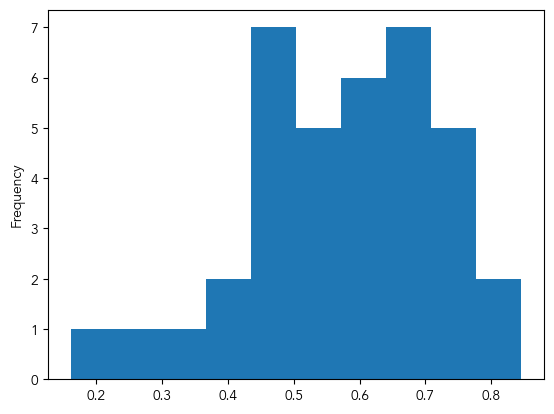

In [71]:
audio_features_df['Danceability'].plot(kind="hist")